<a href="https://colab.research.google.com/github/hariharan13052003/FINAL-YEAR-PROJECT/blob/main/FINAL_YEAR_projectfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image


import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

import re
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))
import plotly.express as px

import gensim
# Importing the corpora module from gensim for creating document-term matrices
from gensim import corpora
# for latent Dirichlet allocation (LDA) topic modeling
from gensim.models import LdaModel

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df = pd.read_csv('Aashirvaad.csv')

In [ ]:
#df = pd.read_csv('B_Natural_juice.csv,, encoding='latin-1'')

In [ ]:
df['Rating'] = df['Rating'].str.extract(r'^(\d+)')
print(df)

                                               Review Rating
0                                   Very good product      5
1                     Superior quality atta\nBest buy      5
2                  Aashirvaad is one of the best Atta      5
3                       Received in good condition. ?      5
4                             Palmoleine fried things      4
..                                                ...    ...
94  The pack which was delivered only had less tha...      1
95                                          nice deal      5
96                        Tastes good n cooks better!      5
97                                   Value for money.      5
98  product is ok and there's lot of price variati...      3

[99 rows x 2 columns]


In [ ]:
print(df.shape)

(99, 2)


In [ ]:
df.head()

,Review,Rating
0,Very good product,5
1,Superior quality atta\nBest buy,5
2,Aashirvaad is one of the best Atta,5
3,Received in good condition. ?,5
4,Palmoleine fried things,4


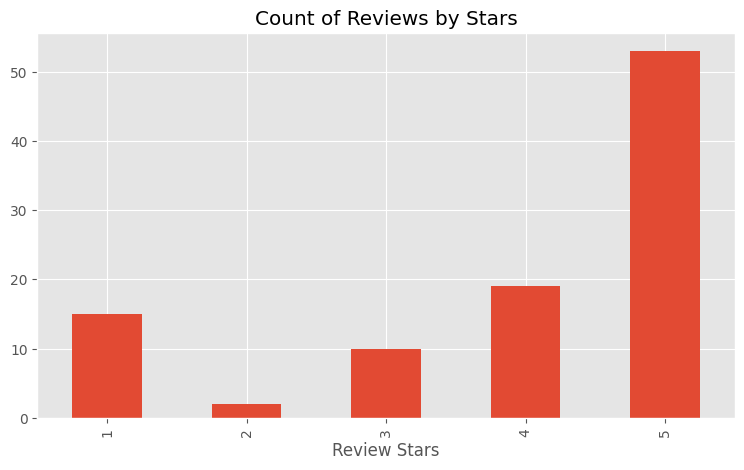

In [ ]:
ax = df['Rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(9,5))
ax.set_xlabel('Review Stars')
plt.show()

In [ ]:
example = df['Review'][73]
print(example)

Since four years we are using Ashirbad Atta from you. Very good product and affordable price also..


In [ ]:
if not isinstance(example, str):
    example = str(example)

tokens = nltk.word_tokenize(example)
tokens[:18]

['Since',
 'four',
 'years',
 'we',
 'are',
 'using',
 'Ashirbad',
 'Atta',
 'from',
 'you',
 '.',
 'Very',
 'good',
 'product',
 'and',
 'affordable',
 'price',
 'also']

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged[:18]

[('Since', 'IN'),
 ('four', 'CD'),
 ('years', 'NNS'),
 ('we', 'PRP'),
 ('are', 'VBP'),
 ('using', 'VBG'),
 ('Ashirbad', 'NNP'),
 ('Atta', 'NNP'),
 ('from', 'IN'),
 ('you', 'PRP'),
 ('.', '.'),
 ('Very', 'RB'),
 ('good', 'JJ'),
 ('product', 'NN'),
 ('and', 'CC'),
 ('affordable', 'JJ'),
 ('price', 'NN'),
 ('also', 'RB')]

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  Since/IN
  four/CD
  years/NNS
  we/PRP
  are/VBP
  using/VBG
  (PERSON Ashirbad/NNP Atta/NNP)
  from/IN
  you/PRP
  ./.
  Very/RB
  good/JJ
  product/NN
  and/CC
  affordable/JJ
  price/NN
  also/RB
  ../VBD)


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [ ]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'compound': 0.4927}

In [ ]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
     Review = row['Review']
     myRating = row['Rating']
     res[myRating] = sia.polarity_scores(Review)
    except AttributeError:
      print(f'Broke for id {myRating}')

  0%|          | 0/99 [00:00<?, ?it/s]

In [ ]:
# Convert 'Review' column to string type
df['Review'] = df['Review'].astype(str)

# Convert 'Rating' column to numeric type
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')  # 'coerce' will convert non-numeric values to NaN

# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    Review = row['Review']
    myRating = row['Rating']
    if not pd.isnull(myRating):  # Skip NaN values
        res[myRating] = sia.polarity_scores(Review)


  0%|          | 0/99 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Rating'})
vaders = vaders.merge(df, how='left')

In [ ]:
vaders.head()

,Rating,neg,neu,pos,compound,Review
0,5,0.0,0.455,0.545,0.34,Very good product
1,5,0.0,0.455,0.545,0.34,Superior quality atta\nBest buy
2,5,0.0,0.455,0.545,0.34,Aashirvaad is one of the best Atta
3,5,0.0,0.455,0.545,0.34,Received in good condition. ?
4,5,0.0,0.455,0.545,0.34,???


In [ ]:
vaders.tail()

,Rating,neg,neu,pos,compound,Review
94,3,0.000,0.872,0.128,0.2960,Manufacturing/\nExpery date not shown any wher...
95,3,0.000,0.872,0.128,0.2960,"Even though it was within the expiry date, the..."
96,3,0.000,0.872,0.128,0.2960,product is ok and there's lot of price variati...
97,2,0.032,0.832,0.135,0.8176,"I ordered it this time, the bag arrived open! ..."
98,2,0.032,0.832,0.135,0.8176,We have been ordering Aashirwad Aata online si...


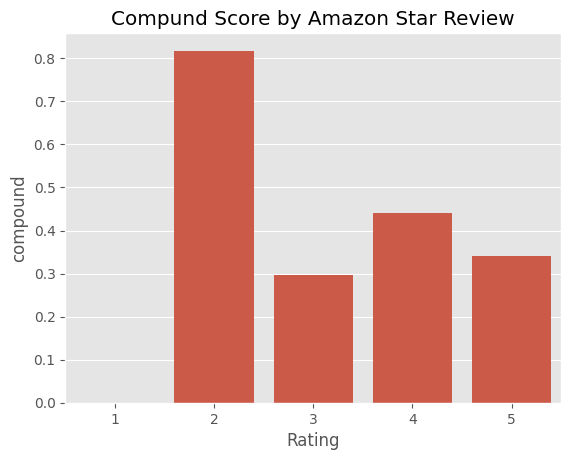

In [ ]:
ax = sns.barplot(data=vaders, x='Rating', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

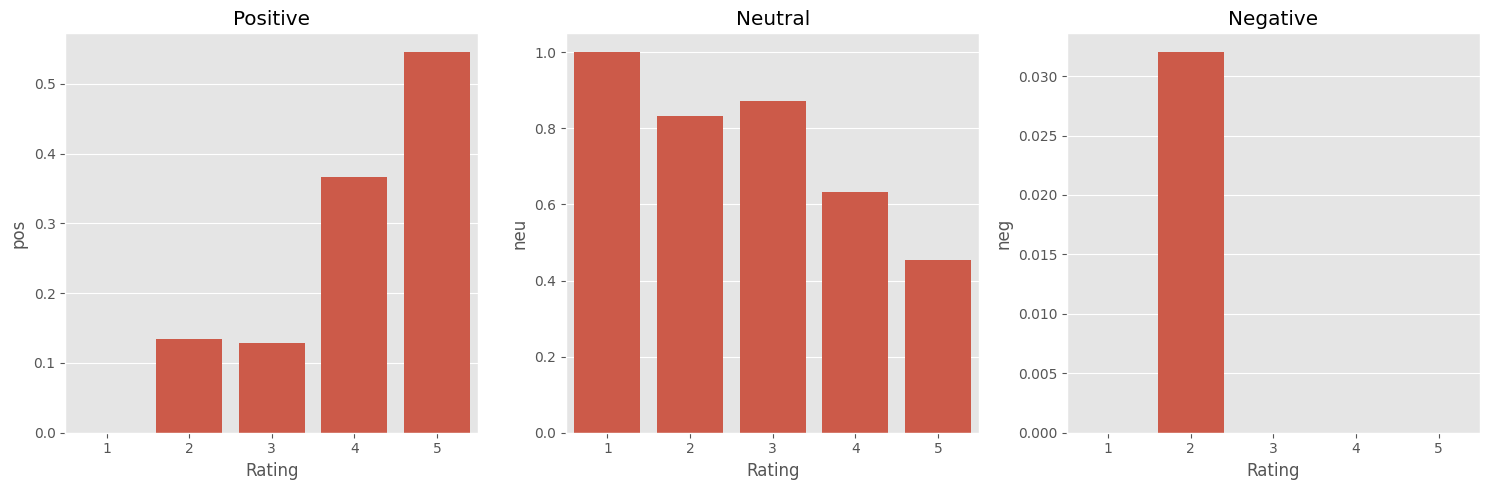

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
# VADER results on example
print(example)
sia.polarity_scores(example)

Since four years we are using Ashirbad Atta from you. Very good product and affordable price also..


{'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'compound': 0.4927}

In [ ]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0017121816, 'roberta_neu': 0.027243795, 'roberta_pos': 0.97104394}


In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        Review = row['Review']
        myRating = row['Rating']
        vader_result = sia.polarity_scores(Review)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(Review)
        both = {**vader_result_rename, **roberta_result}
        res[myRating] = both
    except AttributeError:
        print(f'Broke for id {myRating}')

  0%|          | 0/99 [00:00<?, ?it/s]

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Rating'})
results_df = results_df.merge(df, how='left')

In [ ]:
results_df.columns

Index(['Rating', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Review'],
      dtype='object')

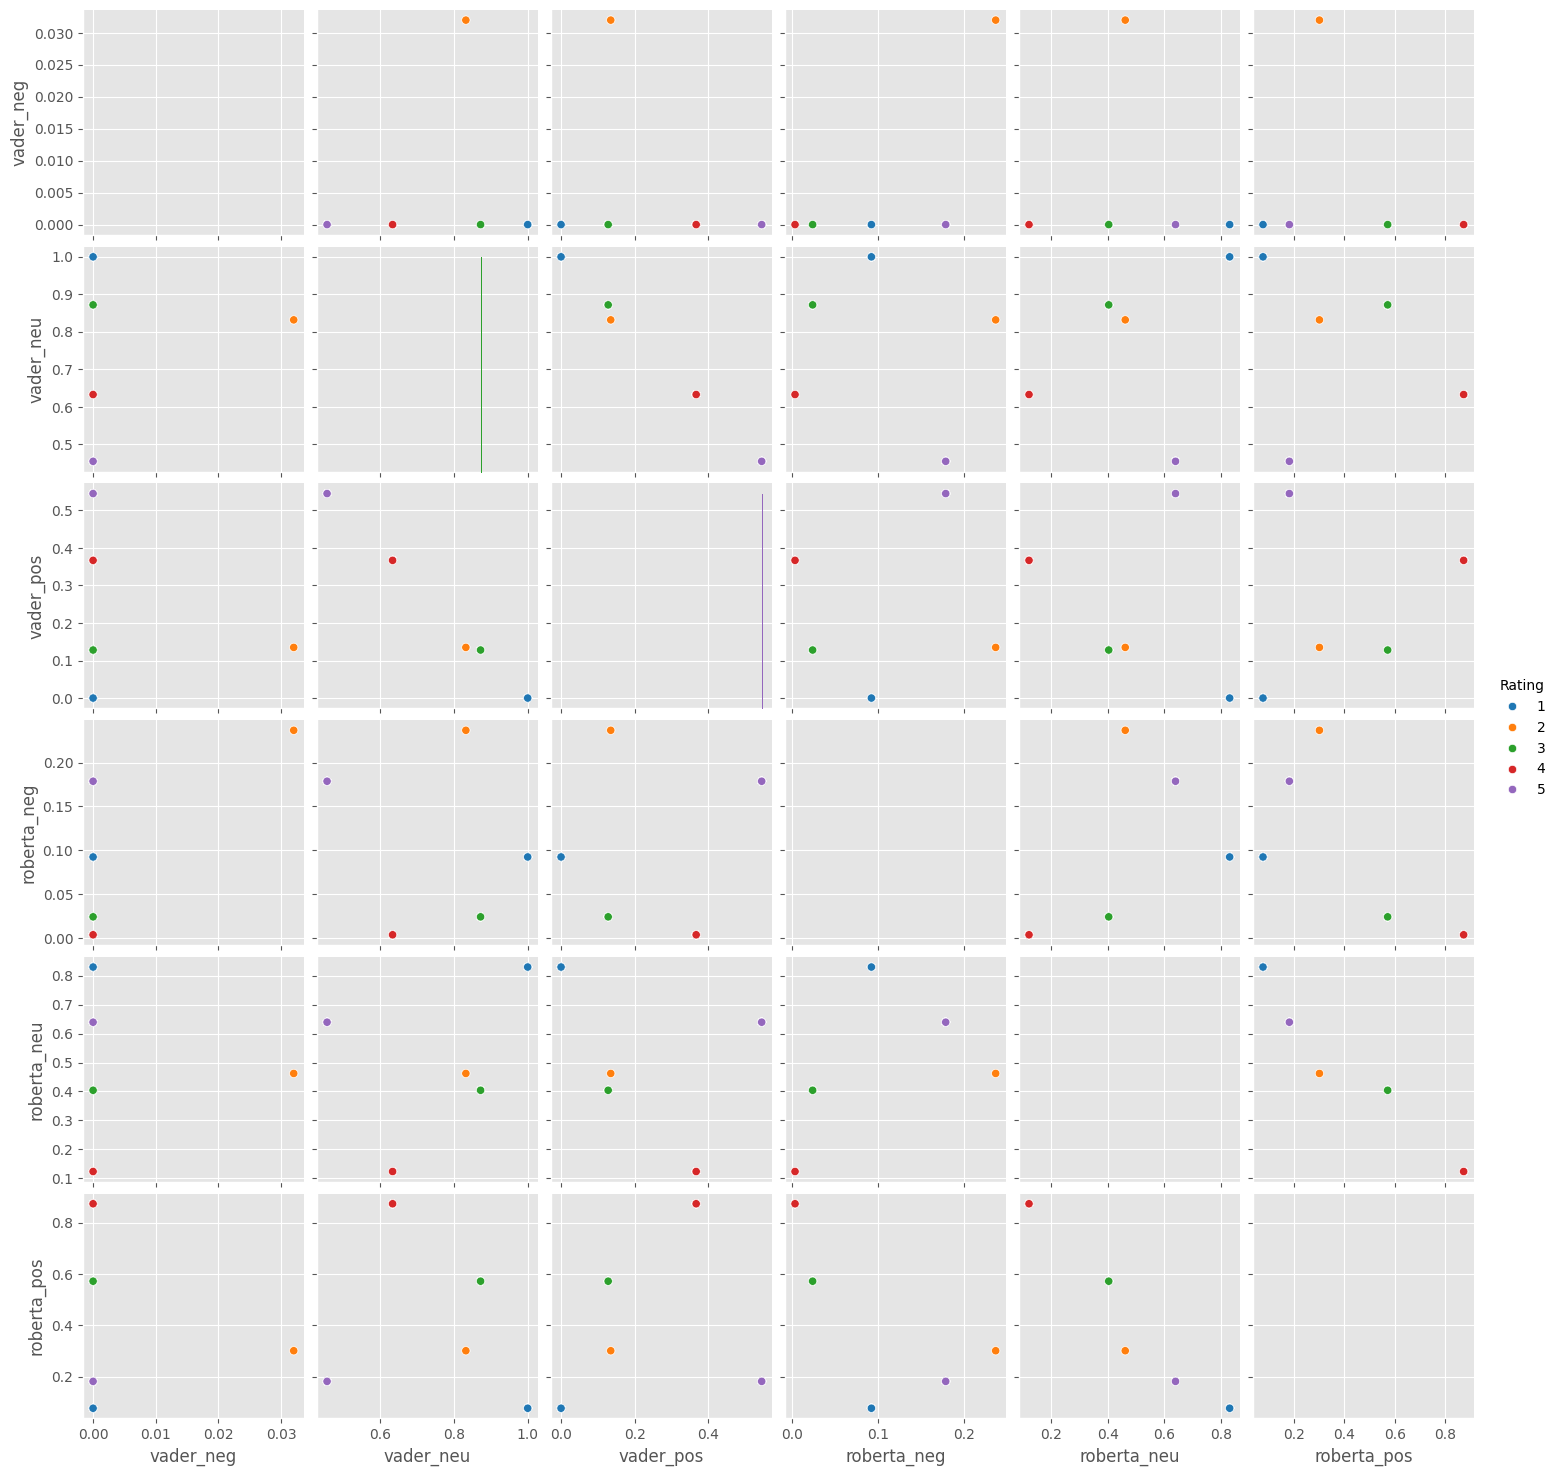

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Rating',
            palette='tab10')
plt.show()

In [ ]:
results_df.head()

,Rating,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Review
0,5,0.0,0.455,0.545,0.34,0.178687,0.639543,0.18177,Very good product
1,5,0.0,0.455,0.545,0.34,0.178687,0.639543,0.18177,Superior quality atta\nBest buy
2,5,0.0,0.455,0.545,0.34,0.178687,0.639543,0.18177,Aashirvaad is one of the best Atta
3,5,0.0,0.455,0.545,0.34,0.178687,0.639543,0.18177,Received in good condition. ?
4,5,0.0,0.455,0.545,0.34,0.178687,0.639543,0.18177,???


In [ ]:
results_df.tail()

,Rating,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Review
94,3,0.000,0.872,0.128,0.2960,0.024223,0.404100,0.571678,Manufacturing/\nExpery date not shown any wher...
95,3,0.000,0.872,0.128,0.2960,0.024223,0.404100,0.571678,"Even though it was within the expiry date, the..."
96,3,0.000,0.872,0.128,0.2960,0.024223,0.404100,0.571678,product is ok and there's lot of price variati...
97,2,0.032,0.832,0.135,0.8176,0.236695,0.462288,0.301018,"I ordered it this time, the bag arrived open! ..."
98,2,0.032,0.832,0.135,0.8176,0.236695,0.462288,0.301018,We have been ordering Aashirwad Aata online si...


<Axes: >

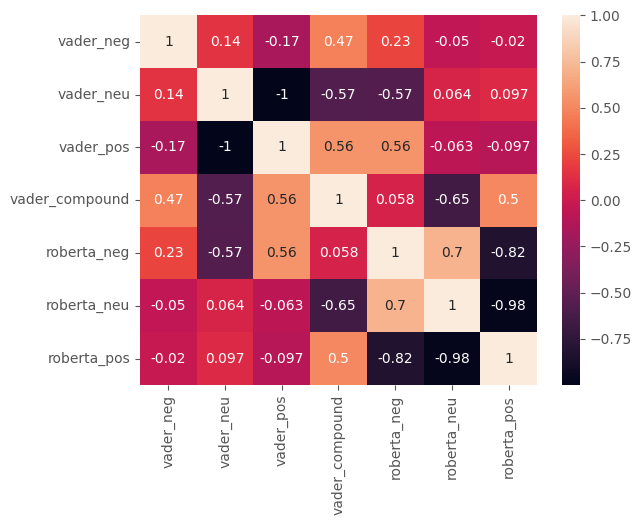

In [ ]:
# @title Correlation matrix of sentiment scores

import seaborn as sns; sns.heatmap(results_df[['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound', 'roberta_neg', 'roberta_neu', 'roberta_pos']].corr(), annot=True)

In [ ]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
sent_pipeline('good')

[{'label': 'POSITIVE', 'score': 0.9998161196708679}]

In [ ]:
sent_pipeline('worst')

[{'label': 'NEGATIVE', 'score': 0.9998016953468323}]

In [ ]:
sent_pipeline('boo')

[{'label': 'NEGATIVE', 'score': 0.9715902209281921}]

In [ ]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  99 non-null     object
 1   Rating  99 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  99 non-null     object
 1   Rating  99 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [ ]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
#     text = [stemmer.stem(word) for word in text.split(' ')]
#     text=" ".join(text)
    return text
df["Review"] = df["Review"].apply(clean)

In [ ]:
texts = df["Review"]
split_text = [d.split() for d in texts]

In [ ]:
dictionary = corpora.Dictionary(split_text)

# filter out words that occur in < 20 reviews, or > 80% of the reviews

dictionary.filter_extremes(no_below = 20, no_above = .8)

# creat corpus: pairing of word id and word frequency in each document

In [ ]:
corpus = [dictionary.doc2bow(text) for text in split_text]

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus, id2word = dictionary, num_topics = 50, passes = 10)

In [ ]:
### Latent Dirichlet Allocation algorithm for topic modeling

In [ ]:
topics = lda_model.print_topics(num_words = 11)
for topic in topics:
    print(topic)

(20, '1.000*"good"')
(12, '1.000*"good"')
(19, '1.000*"good"')
(10, '1.000*"good"')
(32, '1.000*"good"')
(4, '1.000*"good"')
(18, '1.000*"good"')
(2, '1.000*"good"')
(11, '1.000*"good"')
(23, '1.000*"good"')
(44, '1.000*"good"')
(24, '1.000*"good"')
(35, '1.000*"good"')
(45, '1.000*"good"')
(46, '1.000*"good"')
(43, '1.000*"good"')
(16, '1.000*"good"')
(6, '1.000*"good"')
(1, '1.000*"good"')
(26, '1.000*"good"')


In [ ]:
for i, topic in lda_model.show_topics(formatted=False, num_words= 11):
    print('Topic: {} \nWords: {}'.format(i, [w[0] for w in topic]), end = "\n"+"-"*120+"\n")

Topic: 49 
Words: ['good']
------------------------------------------------------------------------------------------------------------------------
Topic: 21 
Words: ['good']
------------------------------------------------------------------------------------------------------------------------
Topic: 28 
Words: ['good']
------------------------------------------------------------------------------------------------------------------------
Topic: 4 
Words: ['good']
------------------------------------------------------------------------------------------------------------------------
Topic: 20 
Words: ['good']
------------------------------------------------------------------------------------------------------------------------
Topic: 10 
Words: ['good']
------------------------------------------------------------------------------------------------------------------------
Topic: 14 
Words: ['good']
--------------------------------------------------------------------------------------

In [ ]:
# Check the data type of the 'Rating' column
print(df['Rating'].dtype)

# If the data type is not 'object' (string), convert it to string
if df['Rating'].dtype != 'object':
    df['Rating'] = df['Rating'].astype(str)

# Now you can use the .str accessor on the 'Rating' column
df['Rating'] = df['Rating'].str.split().str[0].astype(float)

int64


In [ ]:
#df['Rating'] = df['Rating'].str.split().str[0].astype(float)

In [ ]:
df.head()

,Review,Rating
0,good product,5.0
1,superior quality attabest buy,5.0
2,aashirvaad one best atta,5.0
3,received good condition,5.0
4,palmoleine fried things,4.0


In [ ]:
ratings = df["Rating"].value_counts()
numbers = ratings.index
labels = []
for i in numbers:
    labels.append(str(int(i))+ " star rating")

In [ ]:
quantity = ratings.values

figure = px.pie(df,
             values=quantity,
             names=labels,
             title='Customer ratings out of 5',
             hole= 0.4)
figure.show()

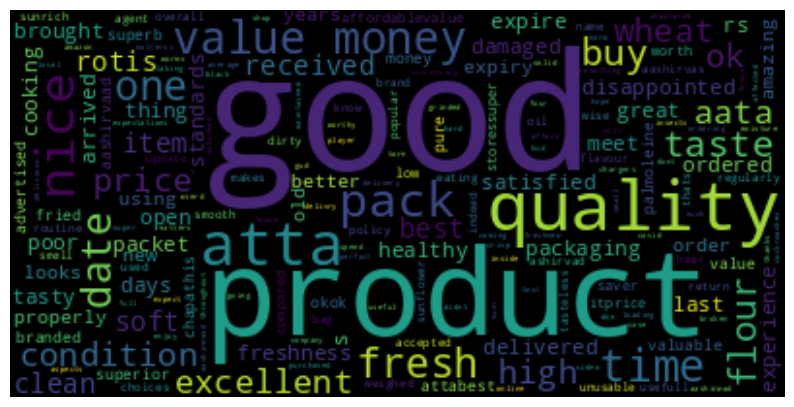

In [ ]:
text = " ".join(i for i in df.Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="black").generate(text)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Review"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Review"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["Review"]]
df = df[["Review", "Positive", "Negative", "Neutral"]]
df.head()

,Review,Positive,Negative,Neutral
0,good product,0.744,0.0,0.256
1,superior quality attabest buy,0.538,0.0,0.462
2,aashirvaad one best atta,0.583,0.0,0.417
3,received good condition,0.592,0.0,0.408
4,palmoleine fried things,0.000,0.0,1.000


In [ ]:
x = sum(df["Positive"])
y = sum(df["Negative"])
z = sum(df["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Overall Positive")
    elif (b>a) and (b>c):
        print("Overall Negative")
    else:
        print("Overall Neutral")
sentiment_score(x, y, z)

Overall Positive


In [ ]:
sentiment_percent = [['Positive', round(x/len(df)*100, 3)],
                     ['Negative', round(y/len(df)*100, 3)],
                     ['Neurtal', round(z/len(df)*100, 3)]]
sentiment_res = pd.DataFrame(sentiment_percent, columns=['Sentiment', 'Percentage'])
sentiment_res

,Sentiment,Percentage
0,Positive,50.451
1,Negative,3.365
2,Neurtal,44.166


In [ ]:
data_neg = df[(df['Negative']>df['Positive']) & (df['Negative']>df['Neutral'])]
data_neg.head()

,Review,Positive,Negative,Neutral
36,poor quality didnt like,0.0,0.723,0.277
40,don’t buy broken,0.0,0.608,0.392


In [ ]:
data_pos = df[(df['Positive']>df['Negative']) & (df['Positive']>df['Neutral'])]
data_pos.head()

,Review,Positive,Negative,Neutral
0,good product,0.744,0.0,0.256
1,superior quality attabest buy,0.538,0.0,0.462
2,aashirvaad one best atta,0.583,0.0,0.417
3,received good condition,0.592,0.0,0.408
7,valuable pack,0.756,0.0,0.244


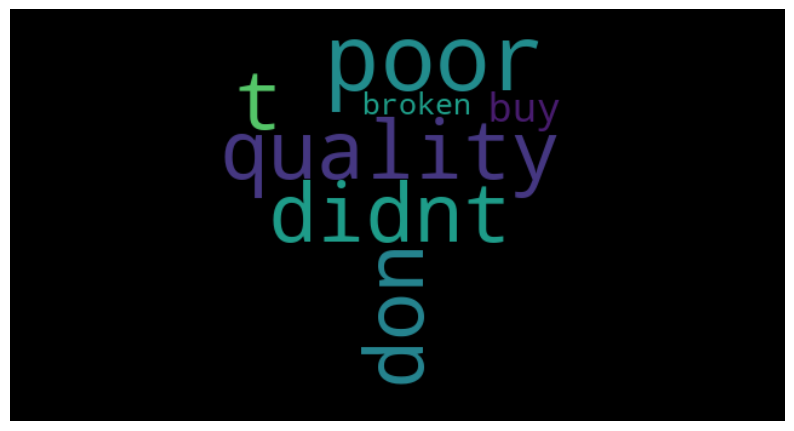

In [ ]:
text = " ".join(i for i in data_neg.Review)
stopwords = set(STOPWORDS)

mask = np.array(Image.open("thumbs-down.jpg"))

wordcloud = WordCloud(stopwords=stopwords, background_color="black", mask = mask, max_words=300).generate(text)
plt.figure( figsize=(10,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

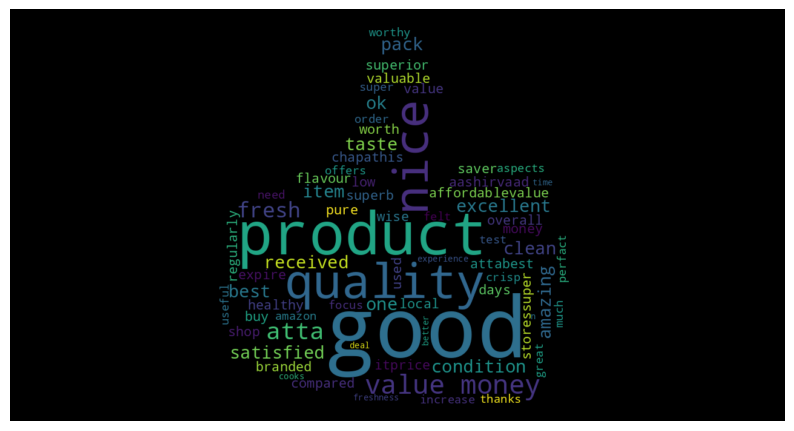

In [ ]:
text = " ".join(i for i in data_pos.Review)
stopwords = set(STOPWORDS)

mask = np.array(Image.open("thumbs-up.jpg"))

wordcloud = WordCloud(stopwords=stopwords, background_color="black", max_words=300, mask=mask).generate(text)
plt.figure(figsize=(10,10))
# plt.imshow(wordcloud, interpolation='bilinear')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()